本书正文的最后一章，我们来看一些真实世界的数据集。对于每个数据集，我们会用之前介绍的方法，从原始数据中提取有意义的内容。展示的方法适用于其它数据集，也包括你的。本章包含了一些各种各样的案例数据集，可以用来练习。

# 14.1 来自Bitly的USA.gov数据-----------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd

# 用纯Python代码对时区进行计数

In [2]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
records = [json.loads(line) for line in open(path)]
len(records)

3560

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
len(time_zones)

3440

In [5]:
# time_zones = [rec.get('tz') for rec in records]
len(time_zones)

3440

In [6]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return ounts


In [7]:
from collections import defaultdict
def get_counts(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [8]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [9]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [10]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# 用pandas对时区进行计数

In [11]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 306.0+ KB


In [12]:
frame['tz'].count()

3440

In [13]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [14]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = 'Unknown'
tz_counts = clean_tz.value_counts()

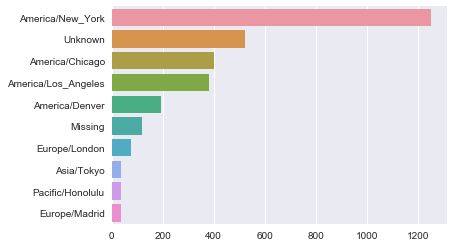

In [15]:
import seaborn as sns
subset = tz_counts[:10]
% matplotlib inline
sns.barplot(y=subset.index, x=subset.values)

a字段含有执行URL短缩操作的浏览器、设备、应用程序的相关信息：

将这些"agent"字符串中的所有信息都解析出来是一件挺郁闷的工作。一种策略是将这种字符串的第一节（与浏览器大致对应）分离出来并得到另外一份用户行为摘要：

In [16]:
results = pd.Series([x.split()[0] for x in frame['a'].dropna()])
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [17]:
cframe = frame[frame['a'].notnull()]

In [18]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe['os']

D:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0           Windows
1       Not Windows
2           Windows
3       Not Windows
4           Windows
5           Windows
6           Windows
7           Windows
8       Not Windows
9           Windows
10          Windows
11      Not Windows
12          Windows
14          Windows
15          Windows
16          Windows
17      Not Windows
18      Not Windows
19          Windows
20          Windows
21      Not Windows
22          Windows
23      Not Windows
24          Windows
25          Windows
26          Windows
27      Not Windows
28      Not Windows
29      Not Windows
30          Windows
           ...     
3529        Windows
3530        Windows
3531    Not Windows
3532        Windows
3533    Not Windows
3534    Not Windows
3535        Windows
3536    Not Windows
3537        Windows
3538    Not Windows
3539    Not Windows
3540        Windows
3541    Not Windows
3542        Windows
3544        Windows
3545        Windows
3546    Not Windows
3547    Not Windows
3548    Not Windows


In [19]:
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [20]:
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [21]:
 agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [22]:
count_subset = count_subset.stack()
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

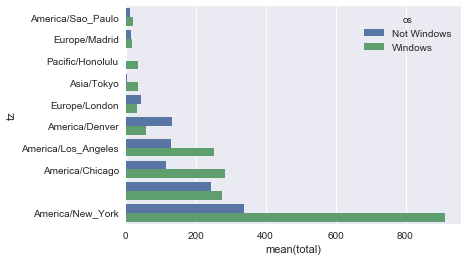

In [23]:
count_subset.name = 'total'
count_subset = count_subset.reset_index()
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

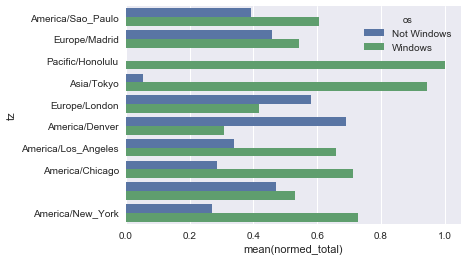

In [24]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

# 14.2 MovieLens 1M数据集---------------------------------------------------------------------

基于机器学习算法的推荐系统一般都会对此类数据感兴趣。虽然我不会在本书中详细介绍机器学习技术，但我会告诉你如何对这种数据进行切片切块以满足实际需求。

MovieLens 1M数据集含有来自6000名用户对4000部电影的100万条评分数据。它分为三个表：评分、用户信息和电影信息。

In [25]:
# 设置显示
pd.options.display.max_rows = 10

In [26]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(r'datasets/movielens/users.dat', sep='::', header=None, engine='python')
users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [27]:
# users.columns = unames
users.rename(columns=dict(zip(users.columns, unames)), inplace=True)  # 还可以任意指定需要改动的映射
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [28]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

D:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [29]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [30]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [31]:
data = pd.merge(pd.merge(ratings, users), movies)  # pandas会根据列名的重叠情况推断出哪些列是合并（或连接）键：
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [32]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995),NaN,3.500000


In [33]:
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title[ratings_by_title>=250].sort_values()
active_titles

title
U Turn (1997)                                                      250
Random Hearts (1999)                                               250
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)     251
Wes Craven's New Nightmare (1994)                                  251
Top Hat (1935)                                                     251
                                                                  ... 
Jurassic Park (1993)                                              2672
Star Wars: Episode VI - Return of the Jedi (1983)                 2883
Star Wars: Episode V - The Empire Strikes Back (1980)             2990
Star Wars: Episode IV - A New Hope (1977)                         2991
American Beauty (1999)                                            3428
Length: 1216, dtype: int64

In [34]:
mean_ratings = mean_ratings.loc[active_titles.index]
mean_ratings

gender,F,M
title,,
U Turn (1997),2.931034,3.095023
Random Hearts (1999),2.483146,2.242236
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991),2.152174,2.121951
Wes Craven's New Nightmare (1994),2.761905,2.832536
Top Hat (1935),4.245763,4.060150
...,...,...
Jurassic Park (1993),3.579407,3.814197
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577


In [35]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# 计算评分分歧

In [36]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[::-1]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [37]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles.index]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 14.3 1880-2010年间全美婴儿姓名--------------------------------------------------------------

下载"National data"文件names.zip，解压后的目录中含有一组文件（如yob1880.txt）。我用UNIX的head命令查看了其中一个文件的前10行（在Windows上，你可以用more命令，或直接在文本编辑器中打开）

由于这是一个非常标准的以逗号隔开的格式，所以可以用pandas.read_csv将其加载到DataFrame中：

In [38]:
names1880 = pd.read_csv(r'datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [39]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

由于该数据集按年度被分隔成了多个文件，所以第一件事情就是要将所有数据都组装到一个DataFrame里面，并加上一个year字段。使用pandas.concat即可达到这个目的：

In [40]:
years = range(1880, 2011)
pieces= []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'datasets/babynames/yob%s.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [41]:
names.groupby(['year', 'sex']).sum().unstack('sex')

births         
sex         F        M
year                  
1880    90993   110493
1881    91955   100748
1882   107851   113687
1883   112322   104632
1884   129021   114445
...       ...      ...
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

[131 rows x 2 columns]

In [42]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


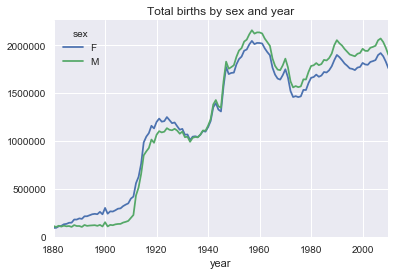

In [43]:
total_births.plot(title='Total births by sex and year')

In [44]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [45]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [46]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [47]:
pieces = []
for (k1,k2), group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
pd.concat(pieces, ignore_index=True)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


# 分析命名趋势

有了完整的数据集和刚才生成的top1000数据集，我们就可以开始分析各种命名趋势了。

In [48]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


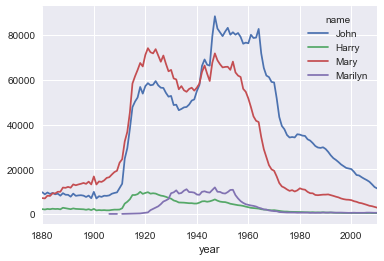

In [49]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot()

# 评估命名多样性的增长

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


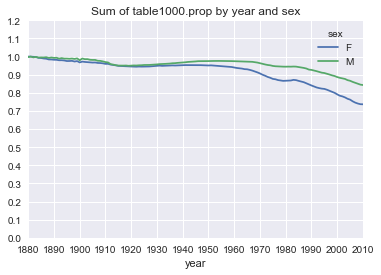

In [50]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10)
          )
table

从图中可以看出，名字的多样性确实出现了增长（前1000项的比例降低）。另一个办法是计算占总出生人数前50%的不同名字的数量，这个数字不太好计算。我们只考虑2010年男孩的名字：

In [51]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
df = boys[boys.year==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [52]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [53]:
prop_cumsum.values.searchsorted(0.5)

116

In [54]:
#  对比1900年的情况
boys[boys.year==1900].sort_values(by='prop', ascending=False).prop.cumsum().values.searchsorted(0.5)

24

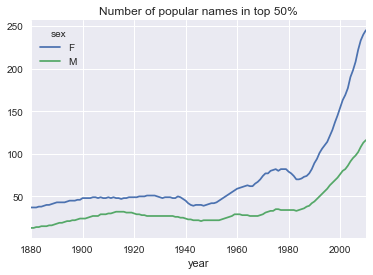

In [55]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity
diversity.plot(title="Number of popular names in top 50%")

In [56]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [57]:
last_letters = names['name'].map(lambda x : x[-1])
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
...              ...      ...      ...    ...          ...       ...   
v                NaN      NaN      NaN    ...       1209.0    1332.0   
w                NaN      NaN      NaN    ...      52265.0   50103.0   
x                NaN      NaN      NaN    ...      10691.0   11009.0   
y            14980.0  17931.0  17601.0    ...     139109.0  134557.0   
z              188.0    238.0    277.0    ...       2840.0    2737.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   
...               ...       ...       ...       ...       ...       ...   
v              1652.0    1823.0    1794.0    2010.0    2295.0    2418.0   
w             49079.0   47556.0   45464.0   43217.0   40251.0   36937.0   
x             11718.0   12399.0   13025.0   13992.0   14306.0   14834.0   
y            130569.0  128367.0  125190.0  123707.0  123397.0  122633.0   
z              2722.0    2710.0    2903.0    3086.0    3301.0    3473.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  
...               ...       ...  
v              2589.0    2723.0  
w             33181.0   30656.0  
x             16640.0   16352.0  
y            112922.0  110425.0  
z              3633.0    3476.0  

[26 rows x 262 columns]

In [58]:
# 选出具有一定代表性的三年
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [59]:
letter_prop = subtable / subtable.sum()

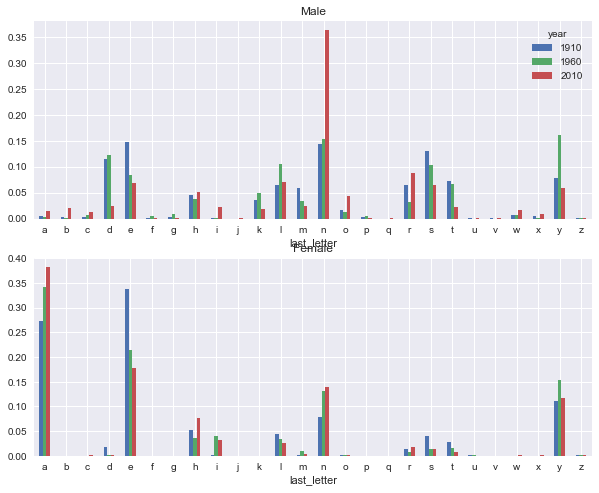

In [60]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

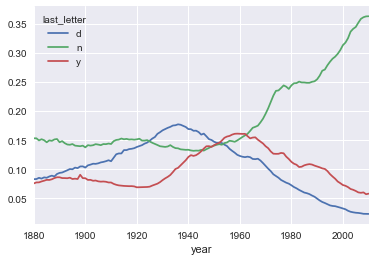

In [61]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.plot()

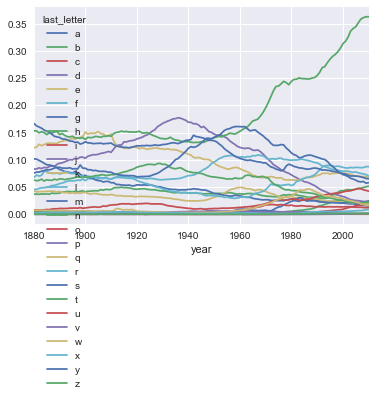

In [62]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[:, 'M'].T
dny_ts.plot()

# 变成女孩名字的男孩名字（以及相反的情况）

In [63]:
all_names = pd.Series(top1000.name.unique())
# 以"lesl"开头的一组名字
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [64]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [65]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


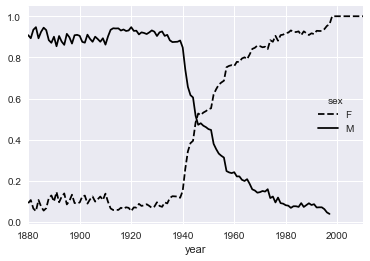

In [66]:
table.plot(style={'M': 'k-', 'F': 'k--'})

# 14.4 USDA食品数据库----------------------------------------------------------------------------

In [67]:
import json

In [68]:
db = json.load(open('datasets/usda_food/database.json'))
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [69]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [70]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [71]:
pd.value_counts(info['group'])

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
                                    ... 
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs                      41
Name: group, Length: 25, dtype: int64

现在，为了对全部营养数据做一些分析，最简单的办法是将所有食物的营养成分整合到一个大表中。

In [72]:
# each_nut = pd.DataFrame(db[0]['nutrients'])
# each_nut['id'] = db[0]['id']
# each_nut
nutrients_list = []
for each in db:
    each_nut = pd.DataFrame(each.get('nutrients'))
    each_nut['id'] = each['id']
    nutrients_list.append(each_nut)

nutrients_list[0]

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
157,Serine,Amino Acids,g,1.472,1008
158,Cholesterol,Other,mg,93.000,1008
159,"Fatty acids, total saturated",Other,g,18.584,1008
160,"Fatty acids, total monounsaturated",Other,g,8.275,1008


In [73]:
nutrients = pd.concat(nutrients_list, ignore_index=True)
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [74]:
nutrients.duplicated().sum()

14179

In [75]:
nutrients = nutrients.drop_duplicates()

In [76]:
col_mapping = {'description' : 'food', 'group': 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [77]:
col_mapping = {'description' : 'nutrient', 'group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.9+ MB


In [78]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 17.2+ MB


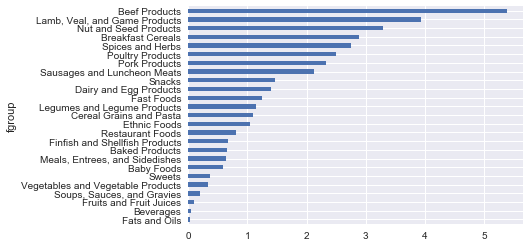

In [79]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [80]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
max_foods.food = max_foods.food.str[:50]
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

# 14.5 2012联邦选举委员会数据库---------------------------------------------------------------

In [82]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

D:\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 68.8+ MB


In [85]:
fec.iloc[0]

cmte_id                  C00410118
cand_id                  P20002978
cand_nm         Bachmann, Michelle
contbr_nm          HARVEY, WILLIAM
contbr_city                 MOBILE
                       ...        
receipt_desc                   NaN
memo_cd                        NaN
memo_text                      NaN
form_tp                      SA17A
file_num                    736166
Name: 0, Length: 16, dtype: object

In [91]:
# 获取全部的候选人名单
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [86]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [92]:
# 候选人姓名得到一组党派信息
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [93]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [94]:
# 为了简化分析过程，我限定该数据集只能有正的出资额
fec = fec[fec.contb_receipt_amt>0]
fec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 17 columns):
cmte_id              991475 non-null object
cand_id              991475 non-null object
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_city          991457 non-null object
contbr_st            991471 non-null object
contbr_zip           991373 non-null object
contbr_employer      983833 non-null object
contbr_occupation    989133 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
receipt_desc         5219 non-null object
memo_cd              89461 non-null object
memo_text            94274 non-null object
form_tp              991475 non-null object
file_num             991475 non-null int64
party                991475 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 79.4+ MB


In [95]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

# 根据职业和雇主统计赞助信息

In [97]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [98]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

fec.contbr_occupation = fec.contbr_occupation.map(lambda x: occ_mapping.get(x, x))
fec.contbr_occupation

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                               RETIRED
4                               RETIRED
                       ...             
1001726                    NOT PROVIDED
1001727                  BUSINESS OWNER
1001728                    NOT PROVIDED
1001729    LONGWALL MAINTENANCE FOREMAN
1001730                    NOT PROVIDED
Name: contbr_occupation, Length: 991475, dtype: object

In [99]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

fec.contbr_employer = fec.contbr_employer.map(lambda x: occ_mapping.get(x, x))

In [103]:
# 根据党派和职业对数据进行聚合，然后过滤掉总出资额不足200万美元的数据
by_occupation = fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [104]:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


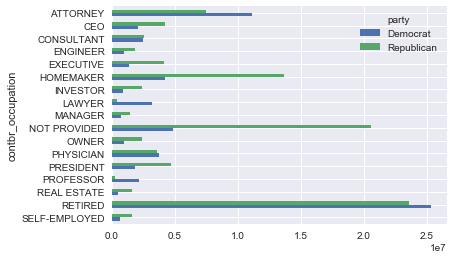

In [110]:
over_2mm.sort_index(ascending=False).plot(kind='barh')

In [114]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [115]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

# 对出资额分组

In [117]:
fec_mrbo.contb_receipt_amt.nlargest(1)

325136    2014490.51
Name: contb_receipt_amt, dtype: float64

In [118]:
bins = np.array([0, 1, 10, 100, 1000, 10000,100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [119]:
# 根据候选人和面元标签进行group
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size()

cand_nm        contb_receipt_amt
Obama, Barack  (0, 1]                  493
               (1, 10]               40070
               (10, 100]            372280
               (100, 1000]          153991
               (1000, 10000]         22284
                                     ...  
Romney, Mitt   (1, 10]                3681
               (10, 100]             31853
               (100, 1000]           43357
               (1000, 10000]         26186
               (10000, 100000]           1
Length: 14, dtype: int64

In [127]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


# 根据州统计赞助信息

In [129]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
...,...,...
WA,4250933.16,1341521.56
WI,1130155.46,270316.32
WV,169154.47,126725.12


In [130]:
percent = totals.div(totals.sum(1), axis=0)
percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
...,...,...
WA,0.760119,0.239881
WI,0.806982,0.193018
WV,0.571700,0.428300
